In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import imblearn
from imblearn.under_sampling import NearMiss

In [2]:
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [21]:
df = pd.read_excel('/content/Data.xls')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0


In [22]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640,C1231006815,170136.000,160296.360,M1979787155,0.000,0.000,0,0
1,1,PAYMENT,1864.280,C1666544295,21249.000,19384.720,M2044282225,0.000,0.000,0,0
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,21182.000,0.000,1,0
4,1,PAYMENT,11668.140,C2048537720,41554.000,29885.860,M1230701703,0.000,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
65530,9,CASH_IN,50529.410,C1132444754,6493984.640,6544514.050,C1956477953,308079.990,0.000,0,0
65531,9,CASH_IN,58429.170,C2059144571,6544514.050,6602943.220,C1137371968,4724976.110,6392871.310,0,0
65532,9,CASH_IN,114387.370,C687420794,6602943.220,6717330.590,C135254299,122030.090,7642.720,0,0
65533,9,CASH_IN,149249.380,C279481988,6717330.590,6866579.970,C527482085,322658.030,198216.730,0,0


In [23]:
df.shape

(65535, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            65535 non-null  int64  
 1   type            65535 non-null  object 
 2   amount          65535 non-null  float64
 3   nameOrig        65535 non-null  object 
 4   oldbalanceOrg   65535 non-null  float64
 5   newbalanceOrig  65535 non-null  float64
 6   nameDest        65535 non-null  object 
 7   oldbalanceDest  65535 non-null  float64
 8   newbalanceDest  65535 non-null  float64
 9   isFraud         65535 non-null  int64  
 10  isFlaggedFraud  65535 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 5.5+ MB


In [25]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,65535.000,65535.000,65535.000,65535.000,65535.000,65535.000,65535.000,65535.000
mean,7.820,162953.707,856009.737,871751.066,845475.200,1177693.997,0.002,0.000
std,1.913,330399.088,2648526.520,2686490.677,2398166.474,2877348.940,0.040,0.000
min,1.000,0.630,0.000,0.000,0.000,0.000,0.000,0.000
25%,8.000,8736.590,0.000,0.000,0.000,0.000,0.000,0.000
50%,8.000,41852.830,19866.000,0.000,10910.630,13707.110,0.000,0.000
75%,9.000,197301.345,161837.380,185324.720,499536.345,947554.330,0.000,0.000
max,9.000,10000000.000,33797391.550,34008736.980,31306920.440,31976992.090,1.000,0.000


In [26]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [27]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [28]:
df.drop(columns=['nameOrig','nameDest'],inplace=True)

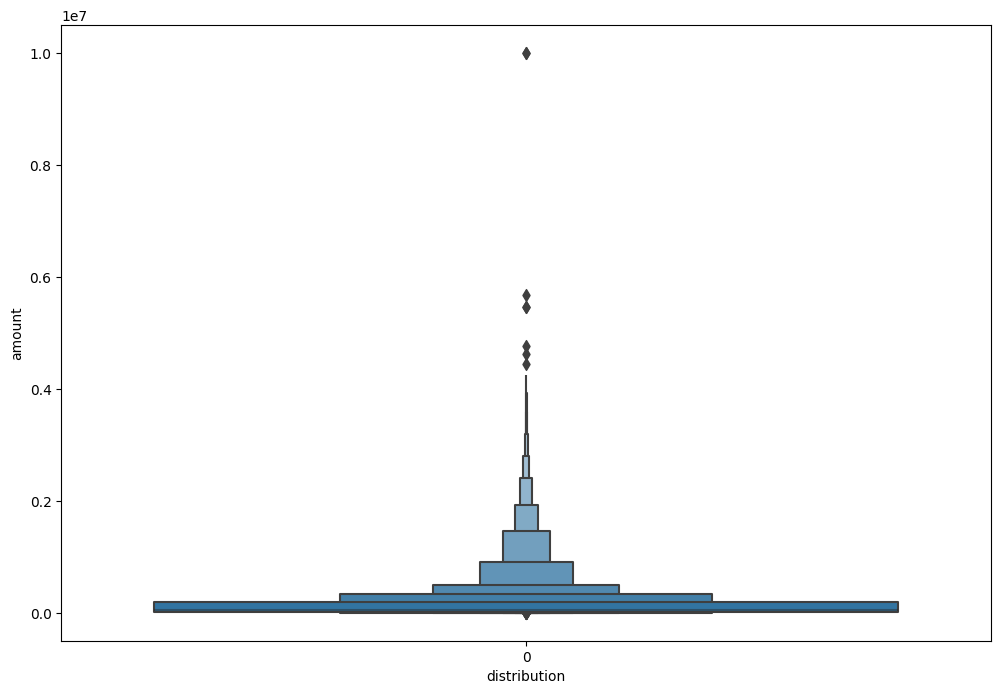

In [29]:
sns.boxenplot(df['amount'])
plt.ylabel('amount')
plt.xlabel('distribution')
plt.show()

Text(0.5, 0, 'distribution')

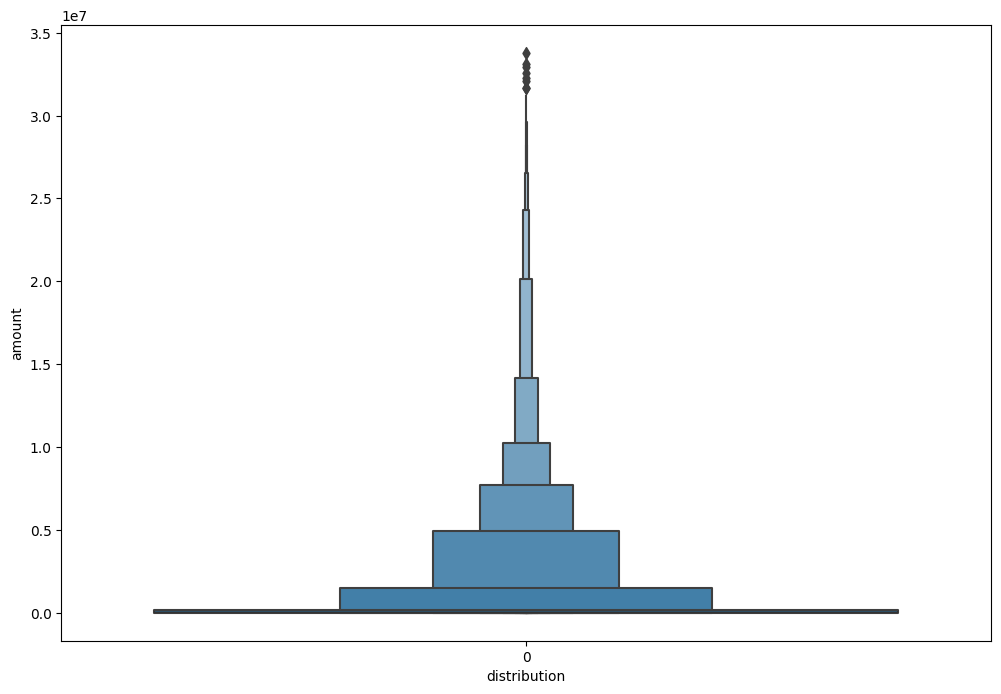

In [30]:
sns.boxenplot(df['oldbalanceOrg'])
plt.ylabel('amount')
plt.xlabel('distribution')

Text(0.5, 0, 'distribution')

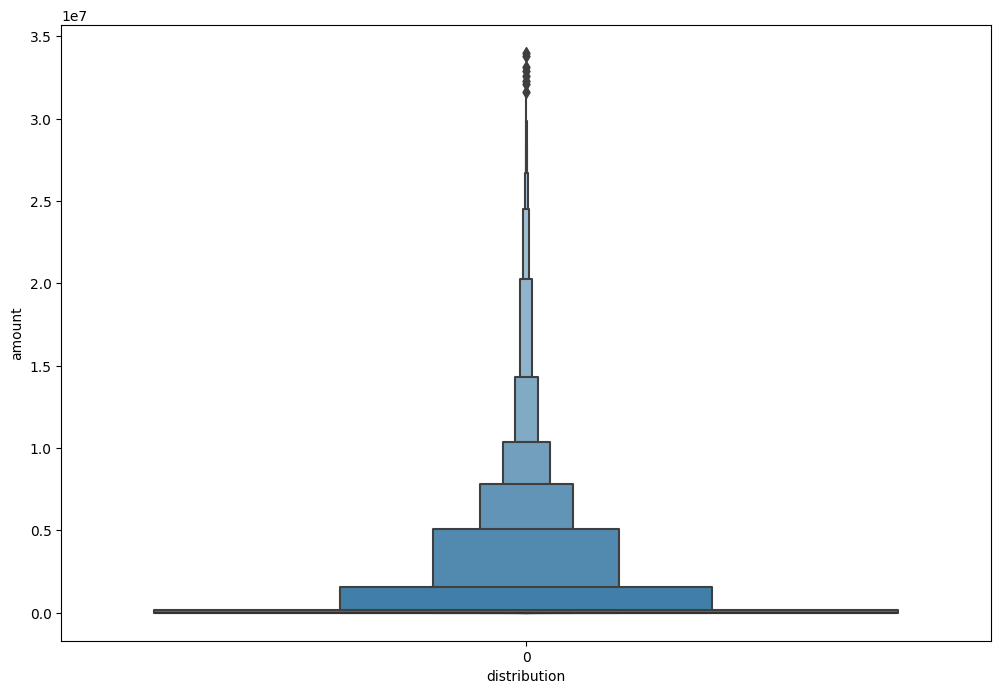

In [31]:
sns.boxenplot(df['newbalanceOrig'])
plt.ylabel('amount')
plt.xlabel('distribution')

Text(0.5, 0, 'distribution')

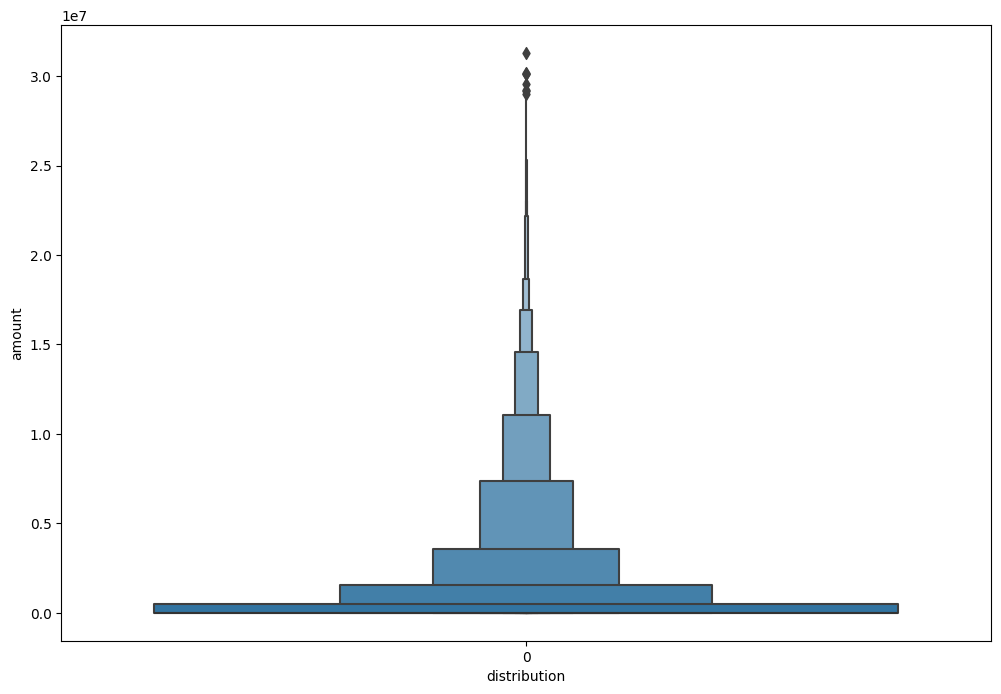

In [32]:
sns.boxenplot(df['oldbalanceDest'])
plt.ylabel('amount')
plt.xlabel('distribution')

Text(0.5, 0, 'distribution')

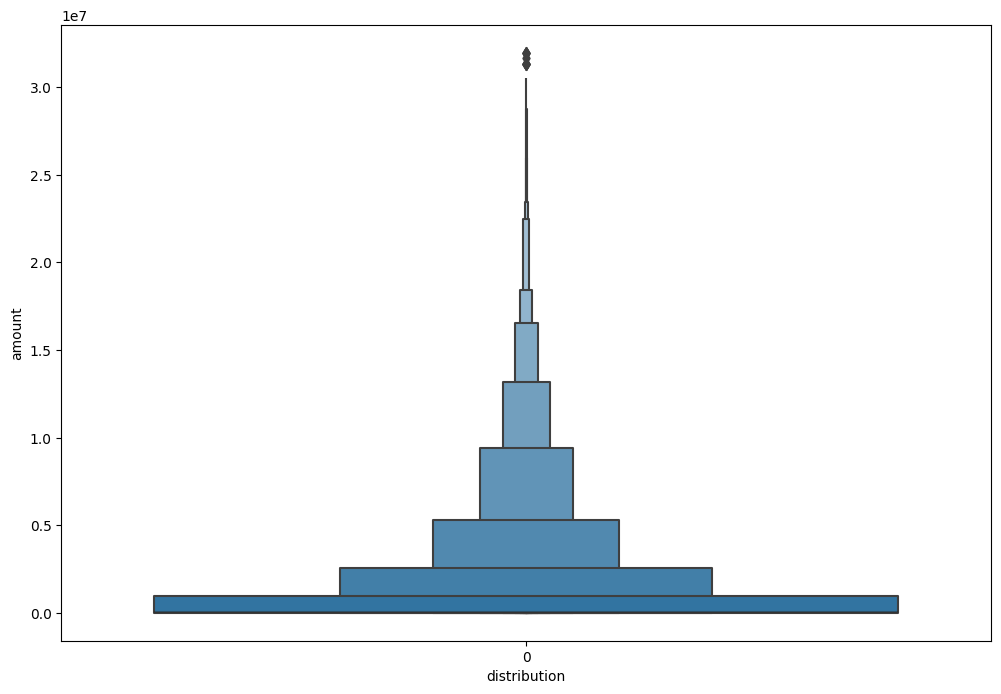

In [33]:
sns.boxenplot(df['newbalanceDest'])
plt.ylabel('amount')
plt.xlabel('distribution')

In [34]:
def remove_outliers(df,col):
    lower_quantile = df[col].quantile(0.25)
    upper_quantile = df[col].quantile(0.75)
    IQR = upper_quantile - lower_quantile
    lower_whisker = lower_quantile - 1.5 * IQR
    upper_whisker = upper_quantile + 1.5 * IQR
    temp = df.loc[(df[col]>lower_whisker)&(df[col]<upper_whisker)]
    return temp[col]

In [35]:
df['amount'] = remove_outliers(df,'amount')
df['oldbalanceOrg'] = remove_outliers(df,'oldbalanceOrg')
df['newbalanceOrig'] = remove_outliers(df,'newbalanceOrig')
df['oldbalanceDest'] = remove_outliers(df,'oldbalanceDest')
df['newbalanceDest'] = remove_outliers(df,'newbalanceDest')

<Axes: >

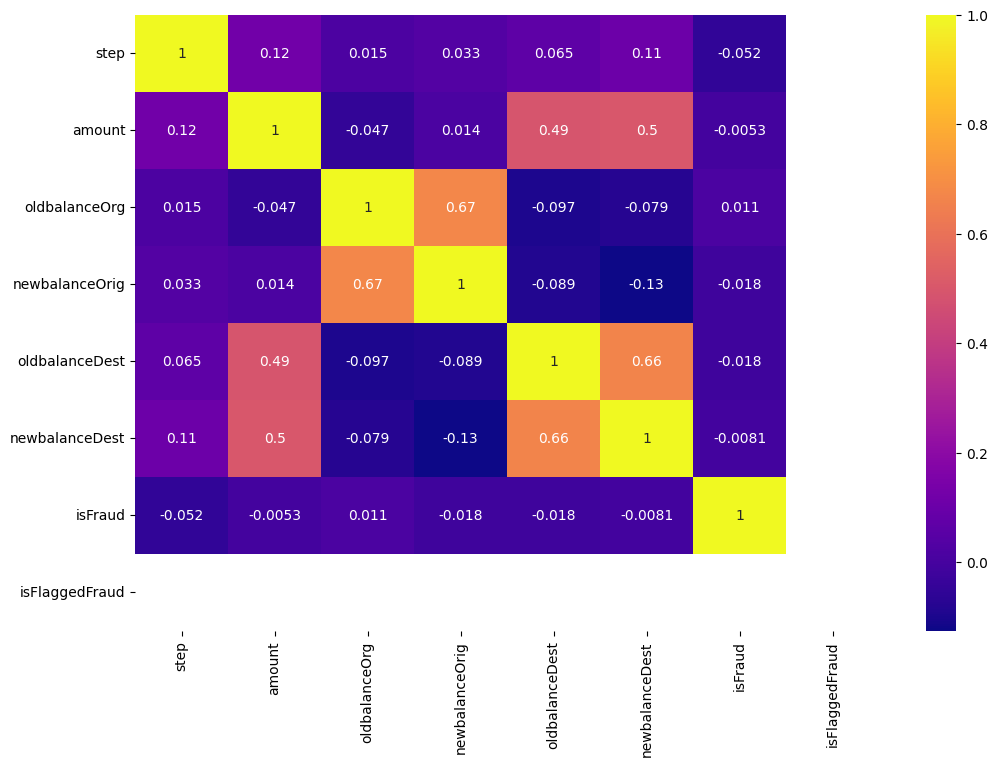

In [36]:
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [37]:
df.groupby('isFraud').describe().T

isFraud                        0           1
step           count   65430.000     105.000
               mean        7.824       5.343
               std         1.909       2.703
               min         1.000       1.000
               25%         8.000       3.000
               50%         8.000       6.000
               75%         9.000       8.000
               max         9.000       9.000
amount         count   61057.000      85.000
               mean    95571.870   78972.505
               std    117470.138  114294.171
               min         0.630     164.000
               25%      8000.090   13704.000
               50%     30345.230   25071.460
               75%    159687.130   86070.170
               max    479828.790  441445.580
oldbalanceOrg  count   53261.000      84.000
               mean    40610.482   60758.319
               std     74114.115   92088.966
               min         0.000       0.000
               25%         0.000   10565.000
               50%      7151.950   21825.500
               75%     43471.000   60726.570
               max    404264.490  361559.690
newbalanceOrig count   53669.000     104.000
               mean    41036.984    4258.824
               std     88154.657   43431.651
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%     29026.680       0.000
               max    463293.360  442917.670
oldbalanceDest count   55767.000     102.000
               mean   153167.695   32937.646
               std    279702.445  122793.536
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%    188097.415    8379.820
               max   1248805.730  894760.680
newbalanceDest count   56706.000      99.000
               mean   305106.598  199019.811
               std    547237.967  464302.101
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%    356154.785  130793.570
               max   2367602.930 2046918.800
isFlaggedFraud count   65430.000     105.000
               mean        0.000       0.000
               std         0.000       0.000
               min         0.000       0.000
               25%         0.000       0.000
               50%         0.000       0.000
               75%         0.000       0.000
               max         0.000       0.000

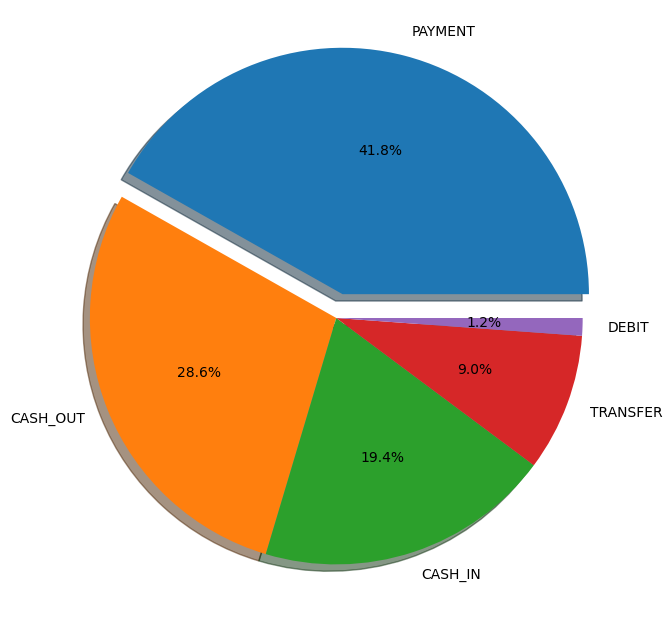

In [40]:
values = df['type'].value_counts().values
labels = df['type'].value_counts().keys()
explode = (0.1,0,0,0,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

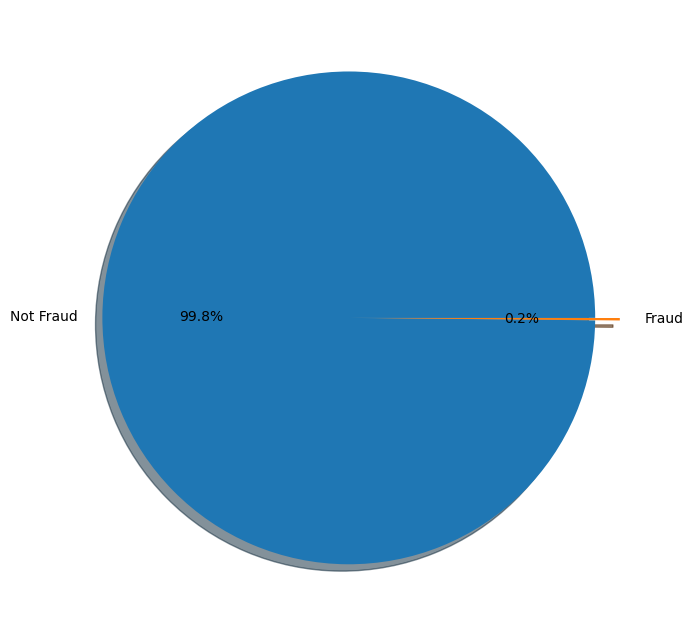

In [41]:
values = df['isFraud'].value_counts().values
labels = ['Not Fraud','Fraud']
explode = (0.1,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.show()

max_amount_type = df.groupby('type')['amount'].max().sort_values(ascending=False).reset_index()[:10]
max_amount_type

In [44]:
max_amount_type = df.groupby('type')['amount'].max().sort_values(ascending=False).reset_index()[:10]
max_amount_type

,type,amount
0,CASH_OUT,479828.790
1,CASH_IN,479701.400
2,TRANSFER,479573.430
3,DEBIT,121693.480
4,PAYMENT,69478.990


<Axes: xlabel='type', ylabel='amount'>

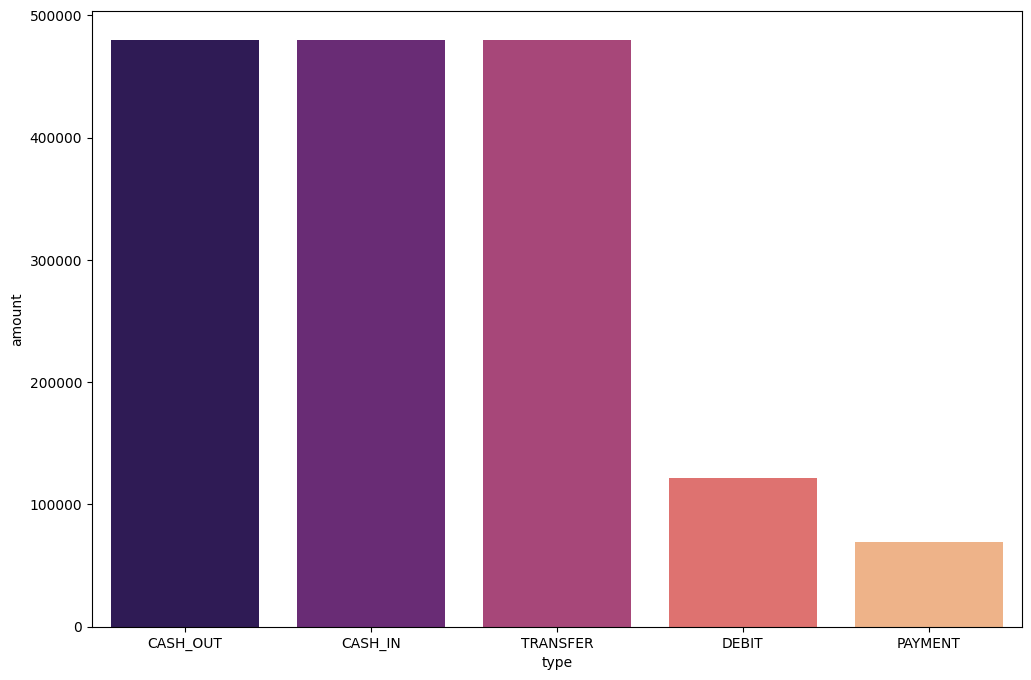

In [45]:
sns.barplot(x='type',y='amount',data=max_amount_type,palette='magma')

Text(0.5, 0, 'isFraud')

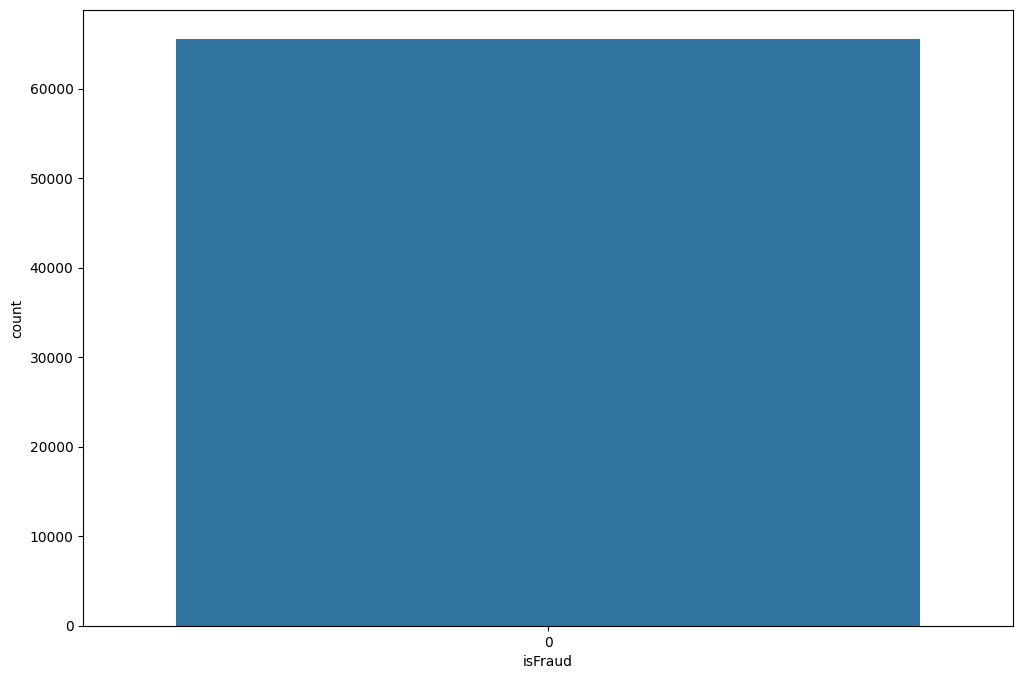

In [46]:
sns.countplot(df['isFraud'])
plt.xlabel('isFraud')

<Axes: xlabel='amount', ylabel='Density'>

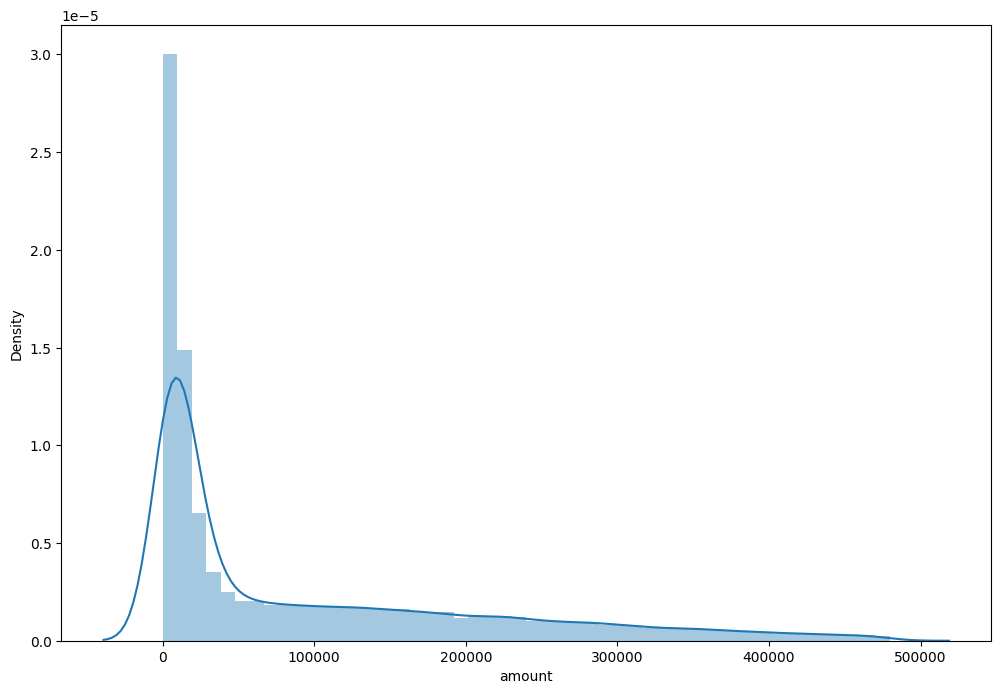

In [47]:
sns.distplot(df['amount'],bins=50)

<Axes: xlabel='amount', ylabel='Density'>

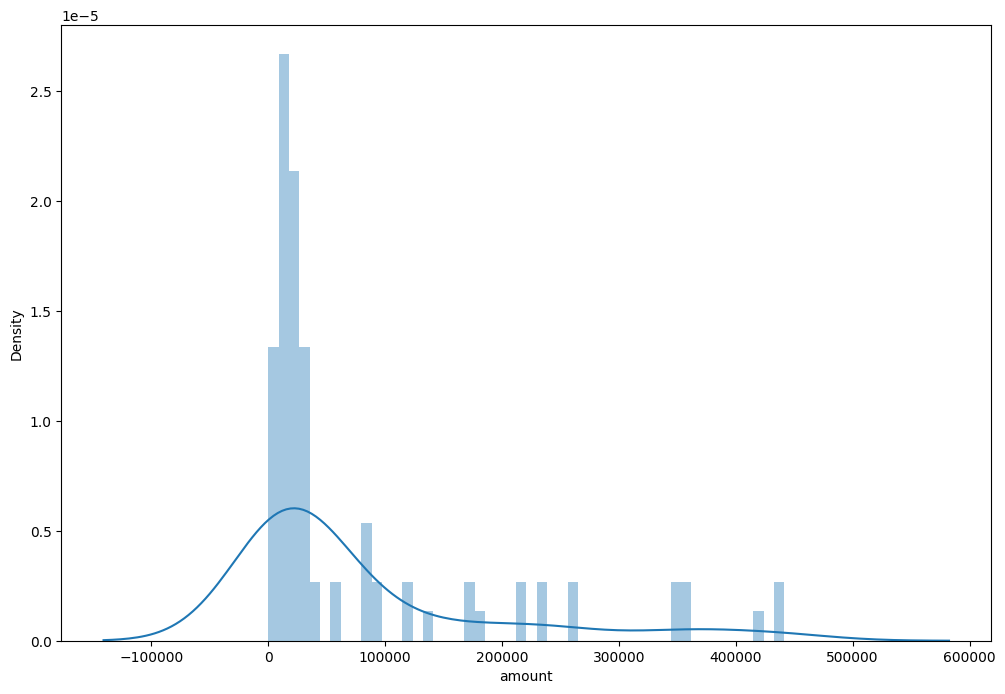

In [48]:
positive_fraud_case = df[df['isFraud']==1]
sns.distplot(positive_fraud_case['amount'],bins=50)

<Axes: xlabel='amount', ylabel='Density'>

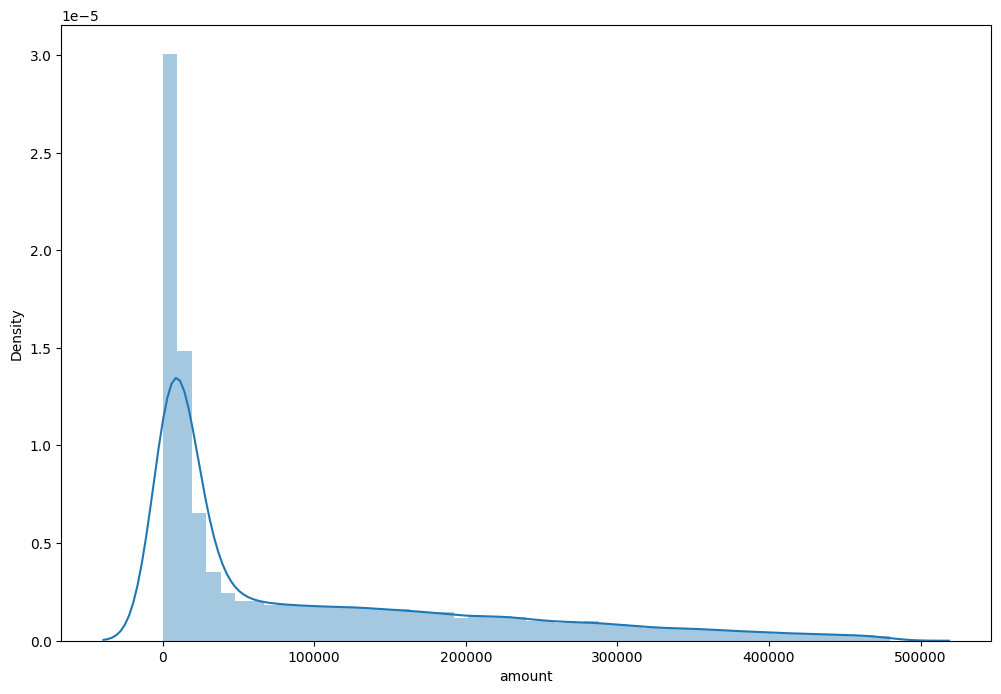

In [49]:
non_fraud_case = df[df['isFraud']==0]
sns.distplot(non_fraud_case['amount'],bins=50)

In [52]:
df['amount'].fillna(df['amount'].mean(),inplace=True)
df['oldbalanceOrg'].fillna(df['oldbalanceOrg'].mean(),inplace=True)
df['newbalanceOrig'].fillna(df['newbalanceOrig'].mean(),inplace=True)
df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(),inplace=True)
df['newbalanceDest'].fillna(df['newbalanceDest'].mean(),inplace=True)

In [53]:
payment_types = pd.get_dummies(df['type'],prefix='type',drop_first=True)
df = pd.concat([df,payment_types],axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.640,170136.000,160296.360,0.000,0.000,0,0,0,0,1,0
1,1,PAYMENT,1864.280,21249.000,19384.720,0.000,0.000,0,0,0,0,1,0
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1,0,0,0,0,1
3,1,CASH_OUT,181.000,181.000,0.000,21182.000,0.000,1,0,1,0,0,0
4,1,PAYMENT,11668.140,41554.000,29885.860,0.000,0.000,0,0,0,0,1,0


In [54]:
df.drop('type',axis=1,inplace=True)

In [55]:
df['type_CASH_OUT'] = df['type_CASH_OUT'].astype(np.int64)
df['type_DEBIT'] = df['type_DEBIT'].astype(np.int64)
df['type_PAYMENT'] = df['type_PAYMENT'].astype(np.int64)
df['type_TRANSFER'] = df['type_TRANSFER'].astype(np.int64)

In [56]:
x = df.drop('isFraud',axis=1)
y = df['isFraud']

In [57]:
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(x,y)

In [58]:
X = x_nm
y = y_nm
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,stratify=y,random_state=2022)

In [59]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [60]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print('ROC AUC Score:',roc_auc_score(y_test,lr_pred))
print('F1 Score:',f1_score(y_test,lr_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,lr_pred))
print('Classification Report:\n',classification_report(y_test,lr_pred))
print('Accuracy Score:',accuracy_score(y_test,lr_pred))

ROC AUC Score: 0.9864864864864865
F1 Score: 0.9866666666666666
Confusion Matrix:
 [[36  1]
 [ 0 37]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

Accuracy Score: 0.9864864864864865


In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [63]:
print("Confusion Matrix:\n",confusion_matrix(y_test,rfc_pred))
print("Classification Report:\n",classification_report(y_test,rfc_pred))
print("ROC AUC Score:",roc_auc_score(y_test,rfc_pred))
print("F1 Score:",f1_score(y_test,rfc_pred))
print('Accuracy Score:',accuracy_score(y_test,rfc_pred))

Confusion Matrix:
 [[37  0]
 [ 1 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.97      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

ROC AUC Score: 0.9864864864864865
F1 Score: 0.9863013698630138
Accuracy Score: 0.9864864864864865


In [64]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [66]:
print("ROC AUC Score:",roc_auc_score(y_test,dtree_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,dtree_pred))
print("F1 Score:",f1_score(y_test,dtree_pred))
print("Classification Report:\n",classification_report(y_test,dtree_pred))
print("Accuracy Score:",accuracy_score(y_test,dtree_pred))

ROC AUC Score: 1.0
Confusion Matrix:
 [[37  0]
 [ 0 37]]
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        37

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

Accuracy Score: 1.0


In [67]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [68]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [69]:
print("ROC AUC Score:",roc_auc_score(y_test,gnb_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,gnb_pred))
print("F1 Score:",f1_score(y_test,gnb_pred))
print("Classification Report:\n",classification_report(y_test,gnb_pred))
print("Accuracy Score:",accuracy_score(y_test,gnb_pred))

ROC AUC Score: 0.9594594594594595
Confusion Matrix:
 [[36  1]
 [ 2 35]]
F1 Score: 0.9589041095890412
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.97      0.95      0.96        37

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

Accuracy Score: 0.9594594594594594


In [70]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1])

In [72]:
print("ROC AUC Score:",roc_auc_score(y_test,knn_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,knn_pred))
print("F1 Score:",f1_score(y_test,knn_pred))
print("Classification Report:\n",classification_report(y_test,knn_pred))
print("Accuracy Score:",accuracy_score(y_test,knn_pred))

ROC AUC Score: 0.9459459459459459
Confusion Matrix:
 [[37  0]
 [ 4 33]]
F1 Score: 0.9428571428571428
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.89      0.94        37

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74

Accuracy Score: 0.9459459459459459


In [74]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [75]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [76]:
print("ROC AUC Score:",roc_auc_score(y_test,svm_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,svm_pred))
print("F1 Score:",f1_score(y_test,svm_pred))
print("Classification Report:\n",classification_report(y_test,svm_pred))
print("Accuracy Score:",accuracy_score(y_test,svm_pred))

ROC AUC Score: 0.9864864864864865
Confusion Matrix:
 [[36  1]
 [ 0 37]]
F1 Score: 0.9866666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

Accuracy Score: 0.9864864864864865


In [77]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
xgb_pred = xgb.predict(X_test)
xgb_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [79]:
print("ROC AUC Score:",roc_auc_score(y_test,xgb_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,xgb_pred))
print("F1 Score:",f1_score(y_test,xgb_pred))
print("Classification Report:\n",classification_report(y_test,xgb_pred))
print("Accuracy Score:",accuracy_score(y_test,xgb_pred))

ROC AUC Score: 1.0
Confusion Matrix:
 [[37  0]
 [ 0 37]]
F1 Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        37

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

Accuracy Score: 1.0


In [80]:
param_grid = {'C': [1,10,100,1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [81]:
grid_search_svm = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid_search_svm.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [82]:
grid_search_svm.best_estimator_

SVC(C=10, gamma=1)

In [83]:
svm = SVC(C=10000,gamma=1)
svm.fit(X_train,y_train)

SVC(C=10000, gamma=1)

In [84]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [85]:
print("ROC AUC Score:",roc_auc_score(y_test,svm_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,svm_pred))
print("F1 Score:",f1_score(y_test,svm_pred))
print("Classification Report:\n",classification_report(y_test,svm_pred))
print("Accuracy Score:",accuracy_score(y_test,svm_pred))

ROC AUC Score: 0.9594594594594594
Confusion Matrix:
 [[37  0]
 [ 3 34]]
F1 Score: 0.9577464788732395
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.92      0.96        37

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

Accuracy Score: 0.9594594594594594


In [86]:
param_grid = {'n_estimators': [100,200,300,400,500],
              'criterion': ['gini','entropy'],
              'class_weight': ['balanced','balanced_subsample']
             }

In [87]:
random_search_rfc = RandomizedSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)
random_search_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END class_weight=balanced_subsample, criterion=gini, n_estimators=500;, score=0.929 total time=   2.6s
[CV 2/5] END class_weight=balanced_subsample, criterion=gini, n_estimators=500;, score=1.000 total time=   2.5s
[CV 3/5] END class_weight=balanced_subsample, criterion=gini, n_estimators=500;, score=0.963 total time=   1.7s
[CV 4/5] END class_weight=balanced_subsample, criterion=gini, n_estimators=500;, score=1.000 total time=   1.0s
[CV 5/5] END class_weight=balanced_subsample, criterion=gini, n_estimators=500;, score=1.000 total time=   1.0s
[CV 1/5] END class_weight=balanced_subsample, criterion=entropy, n_estimators=100;, score=0.929 total time=   0.3s
[CV 2/5] END class_weight=balanced_subsample, criterion=entropy, n_estimators=100;, score=1.000 total time=   0.3s
[CV 3/5] END class_weight=balanced_subsample, criterion=entropy, n_estimators=100;, score=0.963 total time=   0.4s
[CV 4/5] END class_weight=balanced

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=3)

In [88]:
rfc_pred = random_search_rfc.predict(X_test)
rfc_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [89]:
print("ROC AUC Score:",roc_auc_score(y_test,rfc_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,rfc_pred))
print("F1 Score:",f1_score(y_test,rfc_pred))
print("Classification Report:\n",classification_report(y_test,rfc_pred))
print("Accuracy Score:",accuracy_score(y_test,rfc_pred))

ROC AUC Score: 0.9864864864864865
Confusion Matrix:
 [[37  0]
 [ 1 36]]
F1 Score: 0.9863013698630138
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.97      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

Accuracy Score: 0.9864864864864865


In [90]:
param_grid = {'C': [1.0,2.0,3.0,4.0,5.0],
              'solver': ['liblinear','sag','saga'],
              'class_weight': ['balanced']}

In [91]:
random_search_lr = RandomizedSearchCV(LogisticRegression(),param_grid,refit=True,verbose=3)
random_search_lr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=2.0, class_weight=balanced, solver=saga;, score=0.929 total time=   0.0s
[CV 2/5] END C=2.0, class_weight=balanced, solver=saga;, score=1.000 total time=   0.0s
[CV 3/5] END C=2.0, class_weight=balanced, solver=saga;, score=0.963 total time=   0.0s
[CV 4/5] END C=2.0, class_weight=balanced, solver=saga;, score=0.963 total time=   0.0s
[CV 5/5] END C=2.0, class_weight=balanced, solver=saga;, score=0.963 total time=   0.0s
[CV 1/5] END C=3.0, class_weight=balanced, solver=liblinear;, score=0.929 total time=   0.0s
[CV 2/5] END C=3.0, class_weight=balanced, solver=liblinear;, score=1.000 total time=   0.0s
[CV 3/5] END C=3.0, class_weight=balanced, solver=liblinear;, score=0.963 total time=   0.0s
[CV 4/5] END C=3.0, class_weight=balanced, solver=liblinear;, score=0.963 total time=   0.0s
[CV 5/5] END C=3.0, class_weight=balanced, solver=liblinear;, score=0.963 total time=   0.0s
[CV 1/5] END C=4.0, class_weight=b

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1.0, 2.0, 3.0, 4.0, 5.0],
                                        'class_weight': ['balanced'],
                                        'solver': ['liblinear', 'sag', 'saga']},
                   verbose=3)

In [92]:
lr = LogisticRegression(C=5.0,solver='saga',class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(C=5.0, class_weight='balanced', solver='saga')

In [93]:
lr_pred = lr.predict(X_test)
lr_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [94]:
print("ROC AUC Score:",roc_auc_score(y_test,lr_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,lr_pred))
print("F1 Score:",f1_score(y_test,lr_pred))
print("Classification Report:\n",classification_report(y_test,lr_pred))
print("Accuracy Score:",accuracy_score(y_test,lr_pred))

ROC AUC Score: 0.9864864864864865
Confusion Matrix:
 [[36  1]
 [ 0 37]]
F1 Score: 0.9866666666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.97      1.00      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

Accuracy Score: 0.9864864864864865


In [95]:
param_grid = {'criterion': ['gini','entropy'], 'splitter': ['best','random']}

In [96]:
random_search_dtree = RandomizedSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=3)
random_search_dtree.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.929 total time=   0.0s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.926 total time=   0.0s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.963 total time=   0.0s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.963 total time=   0.0s
[CV 5/5] END .....criterion=gini, splitter=best;, score=1.000 total time=   0.0s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.929 total time=   0.0s
[CV 2/5] END ...criterion=gini, splitter=random;, score=1.000 total time=   0.0s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.963 total time=   0.0s
[CV 4/5] END ...criterion=gini, splitter=random;, score=1.000 total time=   0.0s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.926 total time=   0.0s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.929 total time=   0.0s
[CV 2/5] END ..criterion=entropy, splitter=best;,

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'splitter': ['best', 'random']},
                   verbose=3)

In [97]:
dtree = DecisionTreeClassifier(criterion='gini',splitter='random')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')

In [98]:
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1])

In [99]:
print("ROC AUC Score:",roc_auc_score(y_test,dtree_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,dtree_pred))
print("F1 Score:",f1_score(y_test,dtree_pred))
print("Classification Report:\n",classification_report(y_test,dtree_pred))
print("Accuracy Score:",accuracy_score(y_test,dtree_pred))

ROC AUC Score: 0.9864864864864865
Confusion Matrix:
 [[37  0]
 [ 1 36]]
F1 Score: 0.9863013698630138
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.97      0.99        37

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74

Accuracy Score: 0.9864864864864865


In [100]:
param_grid = {'n_neighbors': [1,2,3,4,5],
             'weights': ['uniform','distance'],
             'algorithm': ['auto','ball_tree','kd_tree','brute'],
             'p': [1,2]}

In [101]:
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3)
random_search_knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END algorithm=kd_tree, n_neighbors=2, p=2, weights=distance;, score=0.964 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=2, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=2, p=2, weights=distance;, score=0.963 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=2, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, n_neighbors=2, p=2, weights=distance;, score=0.963 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform;, score=0.963 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, n_neighbors=4, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5] END algorithm=kd

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 2, 3, 4, 5],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   verbose=3)

In [102]:
knn_pred = random_search_knn.predict(X_test)
knn_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1])

In [103]:
print("ROC AUC Score:",roc_auc_score(y_test,knn_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,knn_pred))
print("F1 Score:",f1_score(y_test,knn_pred))
print("Classification Report:\n",classification_report(y_test,knn_pred))
print("Accuracy Score:",accuracy_score(y_test,knn_pred))

ROC AUC Score: 0.9459459459459459
Confusion Matrix:
 [[37  0]
 [ 4 33]]
F1 Score: 0.9428571428571428
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      0.89      0.94        37

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74

Accuracy Score: 0.9459459459459459


In [104]:
print("Performance of ML Models:")
print('Predictive Accuracy of Logistic Regression:',str(np.round(accuracy_score(y_test,lr_pred)*100,2)) + '%')
print('Predictive Accuracy of K Neighbors Classifier:',str(np.round(accuracy_score(y_test,knn_pred)*100,2)) + '%')
print('Predictive Accuracy of Support Vector Classifier:',str(np.round(accuracy_score(y_test,svm_pred)*100,2)) + '%')
print('Predictive Accuracy of Decision Tree Classifier:',str(np.round(accuracy_score(y_test,dtree_pred)*100,2)) + '%')
print('Predictive Accuracy of Random Forest Classifier:',str(np.round(accuracy_score(y_test,rfc_pred)*100,2)) + '%')
print('Predictive Accuracy of Gaussian Naive Bayes:',str(np.round(accuracy_score(y_test,gnb_pred)*100,2)) + '%')
print('Predictive Accuracy of XGBoost Classifier:',str(np.round(accuracy_score(y_test,xgb_pred)*100,2)) + '%')

Performance of ML Models:
Predictive Accuracy of Logistic Regression: 98.65%
Predictive Accuracy of K Neighbors Classifier: 94.59%
Predictive Accuracy of Support Vector Classifier: 95.95%
Predictive Accuracy of Decision Tree Classifier: 98.65%
Predictive Accuracy of Random Forest Classifier: 98.65%
Predictive Accuracy of Gaussian Naive Bayes: 95.95%
Predictive Accuracy of XGBoost Classifier: 100.0%
